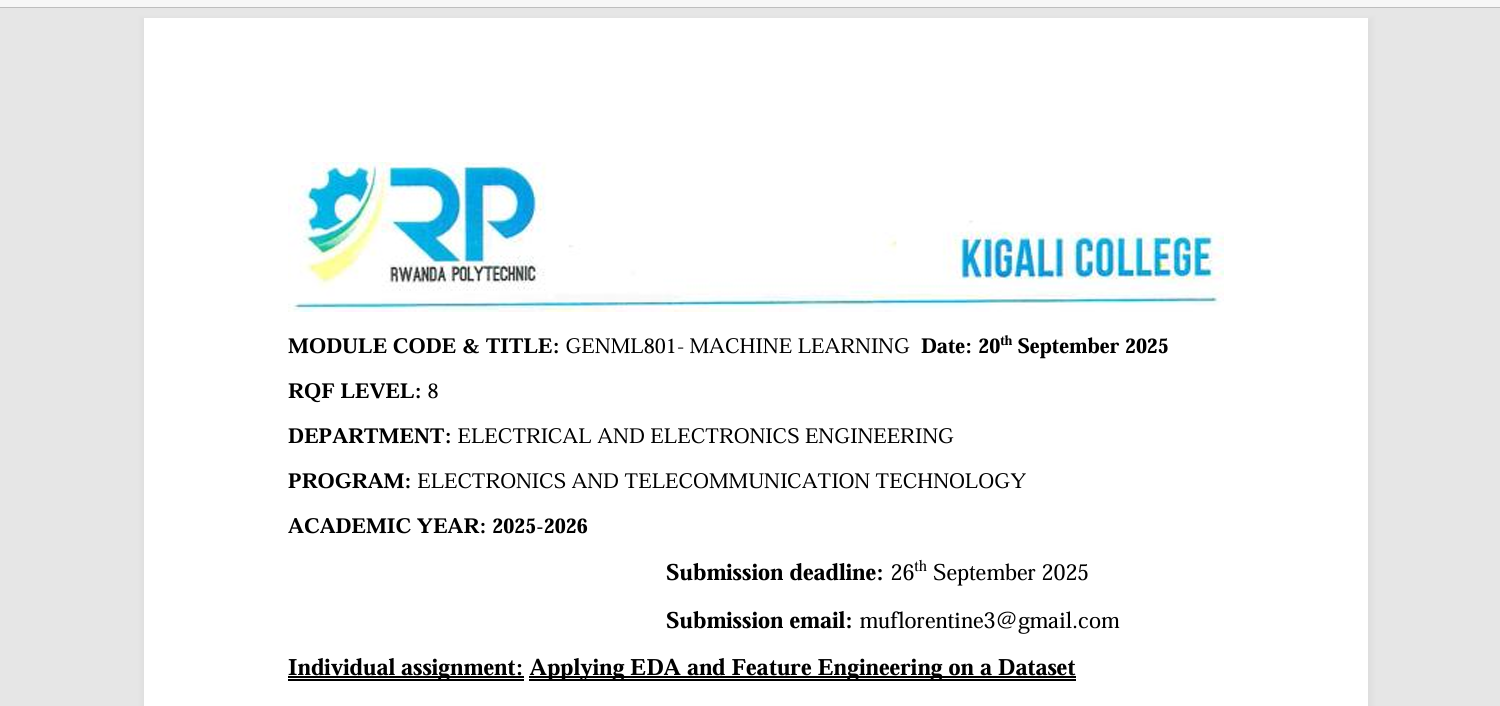

## NAME: NSHIMIYIMANA Emmanuel
## REG number: 25RP21315
## Date: 01/10/2025


## 1.Importing necessary libralies 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings("ignore")

## 2. Loading Dataset 

In [2]:
# 1. Load dataset (change the file name to your CSV)
weather_dataset = pd.read_csv("seattle-weather..csv")

print("dataset preview:")
print(weather_dataset.head)


dataset preview:
<bound method NDFrame.head of       precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7  drizzle
1              10.9      10.6       2.8   4.5     rain
2               0.8      11.7       7.2   2.3     rain
3              20.3      12.2       5.6   4.7     rain
4               1.3       8.9       2.8   6.1     rain
...             ...       ...       ...   ...      ...
1456            8.6       4.4       1.7   2.9     rain
1457            1.5       5.0       1.7   1.3     rain
1458            0.0       7.2       0.6   2.6      fog
1459            0.0       5.6      -1.0   3.4      sun
1460            0.0       5.6      -2.1   3.5      sun

[1461 rows x 5 columns]>


## 3. Dataset description

## 3.1. columns 

In [3]:
weather_dataset.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

## 3.2 Shape of the dataset( number of colums and rows)

In [8]:
weather_dataset.shape

(1461, 5)

In [18]:
X

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


## 4.Apply Feature Engineering Techniques

## 4.1  Handles missing values

### 4.1.0. check missing values

In [19]:
# check missing values
weather_dataset.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

## 4.1.1 handle missing values

In [20]:
# handle missing values
weather_dataset['precipitation'].fillna(weather_dataset['precipitation'].median(), inplace=True)
weather_dataset['temp_max'].fillna(weather_dataset['temp_max'].median(), inplace=True)
weather_dataset['temp_min'].fillna(weather_dataset['temp_min'].median(), inplace=True)
weather_dataset['wind'].fillna(weather_dataset['wind'].median(), inplace=True)


## 4.1.2 remove missed values

In [21]:
# remove missed values
weather_dataset.dropna(inplace=True)


## 4.1.3  getting the statistical measures of the data

In [22]:
print("DATAFRAME COLUMNS:", weather_dataset.columns.tolist())
print(weather_dataset.head())

DATAFRAME COLUMNS: ['precipitation', 'temp_max', 'temp_min', 'wind', 'weather']
   precipitation  temp_max  temp_min  wind  weather
0            0.0      12.8       5.0   4.7  drizzle
1           10.9      10.6       2.8   4.5     rain
2            0.8      11.7       7.2   2.3     rain
3           20.3      12.2       5.6   4.7     rain
4            1.3       8.9       2.8   6.1     rain


In [23]:
# getting the statistical measures of the data
weather_dataset.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


## 4.2 Features and target

In [24]:
# Ensure the target column name matches what's in your CSV
TARGET_COL = "weather"
if TARGET_COL not in weather_dataset.columns:
    raise ValueError(f"Target column '{TARGET_COL}' not found. Columns: {weather_dataset.columns.tolist()}")

# -------------------------
# 2) Features and target
# -------------------------
X = weather_dataset.drop(TARGET_COL, axis=1)
y = weather_dataset[TARGET_COL]


# -------------------------

## 4.3  Encode labels

In [25]:
# 3) Encode labels
# -------------------------
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("Classes (encoded):", dict(enumerate(label_encoder.classes_)))


Classes (encoded): {0: 'drizzle', 1: 'fog', 2: 'rain', 3: 'snow', 4: 'sun'}


## 4.4 Train / test split

In [26]:
# 4) Train / test split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split( X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [27]:
# 5) Train Decision Tree
# -------------------------
weather_dataset_model = DecisionTreeClassifier(random_state=42)
weather_dataset_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

##  4.5 Evaluate model 

In [28]:
# 6) Evaluate
# -------------------------
prediction = weather_dataset_model.predict(X_test)
acc = accuracy_score(y_test, prediction)*100
print(f"\nDecision Tree Accuracy: {acc:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, prediction, target_names=label_encoder.classes_.tolist()))



Decision Tree Accuracy: 74.7440

Classification Report:
              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        11
         fog       0.14      0.20      0.17        20
        rain       0.94      0.91      0.92       129
        snow       0.60      0.60      0.60         5
         sun       0.78      0.74      0.76       128

    accuracy                           0.75       293
   macro avg       0.49      0.49      0.49       293
weighted avg       0.77      0.75      0.76       293



## 5.Apply Exploratory Data Analysis (EDA)

## 5.0. Confusion matrix

In [29]:
cm = confusion_matrix(y_test, prediction)
cm_weather_dataset= pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)
print("\nConfusion Matrix:")
print(cm_weather_dataset)



Confusion Matrix:
         drizzle  fog  rain  snow  sun
drizzle        0    0     2     0    9
fog            5    4     1     0   10
rain           1    1   117     2    8
snow           0    0     2     3    0
sun            7   23     3     0   95


In [30]:
print("\nModel expects features in this order:", X.columns.tolist())


Model expects features in this order: ['precipitation', 'temp_max', 'temp_min', 'wind']


In [31]:

# Replace this example with real values matching your columns
input_data = [[20.0, 12.2, 5.6, 25.7]]   # <- make sure length matches X.columns
prediction= weather_dataset_model.predict(input_data)
predicted_class = label_encoder.inverse_transform(prediction)
print("Tomorrow prediction:", predicted_class[0])

Tomorrow prediction: rain


## 5.1.Barchart of dataset

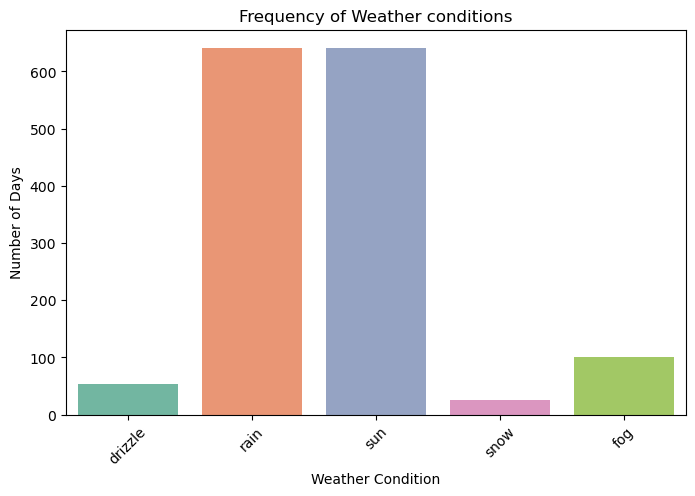

In [32]:

# barchart of dataset
# Count of weather categories
plt.figure(figsize=(8,5))
sns.countplot(data=weather_dataset, x='weather', palette='Set2')

plt.title("Frequency of Weather conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Days")
plt.xticks(rotation=45)
plt.show()


## 5.3 Confusion matrix on the graph

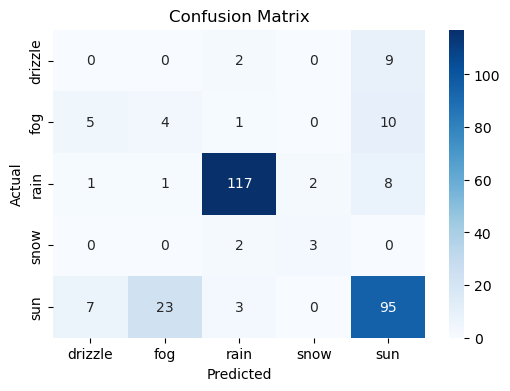

In [33]:

from sklearn.metrics import confusion_matrix

prediction = weather_dataset_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, prediction)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## 5.4 Histogram for precipitation

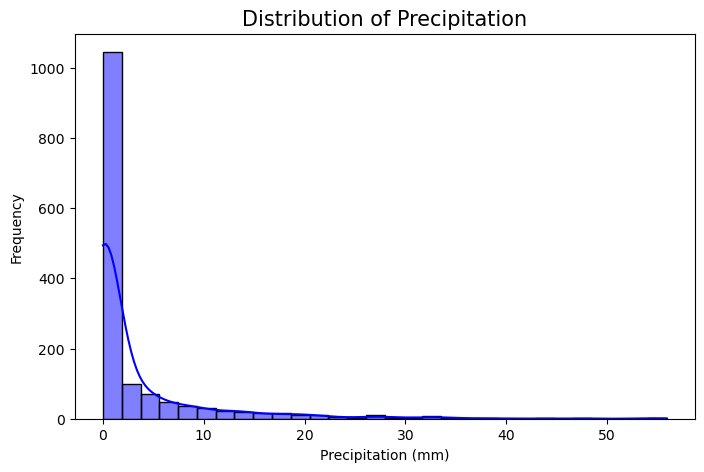

In [34]:
# Histogram for precipitation
plt.figure(figsize=(8,5))
sns.histplot(weather_dataset['precipitation'], bins=30, kde=True, color='blue')

plt.title("Distribution of Precipitation", fontsize=15)
plt.xlabel("Precipitation (mm)")
plt.ylabel("Frequency")
plt.show()


## 5.5 Boxplot for temp_max and temp_min with outliers labeled

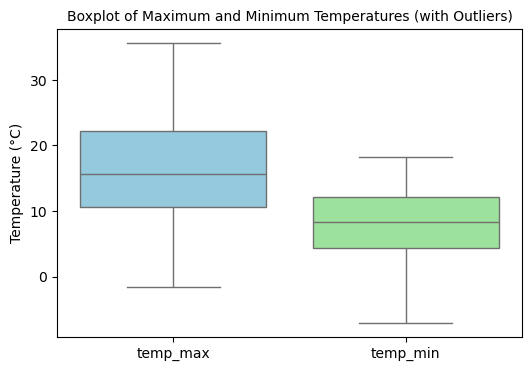

Outliers in temp_max:
Series([], Name: temp_max, dtype: float64)

Outliers in temp_min:
Series([], Name: temp_min, dtype: float64)


In [35]:
 # Boxplot for temp_max and temp_min with outliers labeled
# -----------------------------
plt.figure(figsize=(6,4))

# Use a valid palette or list of colors
ax = sns.boxplot(data=weather_dataset[['temp_max', 'temp_min']], palette=["skyblue", "lightgreen"])

plt.title("Boxplot of Maximum and Minimum Temperatures (with Outliers)", fontsize=10)
plt.ylabel("Temperature (°C)")

# -----------------------------
# Identify outliers and label them
# -----------------------------
def label_outliers(series, column_name):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    
    # Plot each outlier as red dot and label index
    for idx, value in outliers.items():
        plt.text(x=column_name, y=value, s=str(idx), color='red', fontsize=5, horizontalalignment='center')
    
    return outliers
# Label outliers for temp_max (x=0) and temp_min (x=1)
outliers_max = label_outliers(weather_dataset['temp_max'], 30)
outliers_min = label_outliers(weather_dataset['temp_min'], 15)

plt.show()

# -----------------------------
# Print outlier values in console
# -----------------------------
print("Outliers in temp_max:")
print(outliers_max)

print("\nOutliers in temp_min:")
print(outliers_min)

## 5.6 Histogram for wind

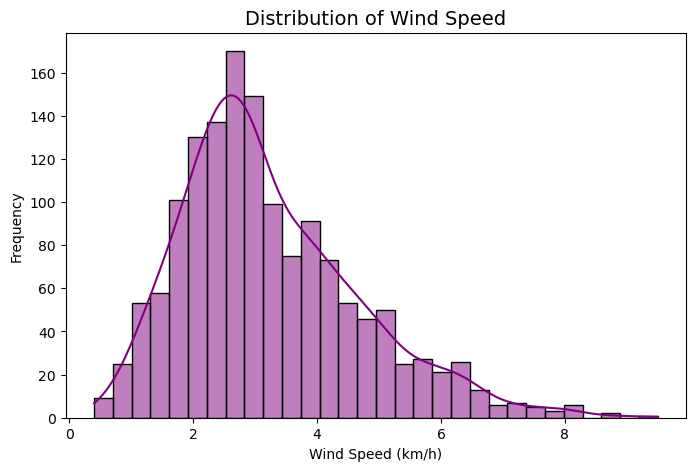

In [36]:
# Histogram for wind
plt.figure(figsize=(8,5))
sns.histplot(weather_dataset['wind'], bins=30, kde=True, color='purple')

plt.title("Distribution of Wind Speed", fontsize=14)
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Frequency")
plt.show()

## 5.7 Boxplot of temp_max grouped by weather

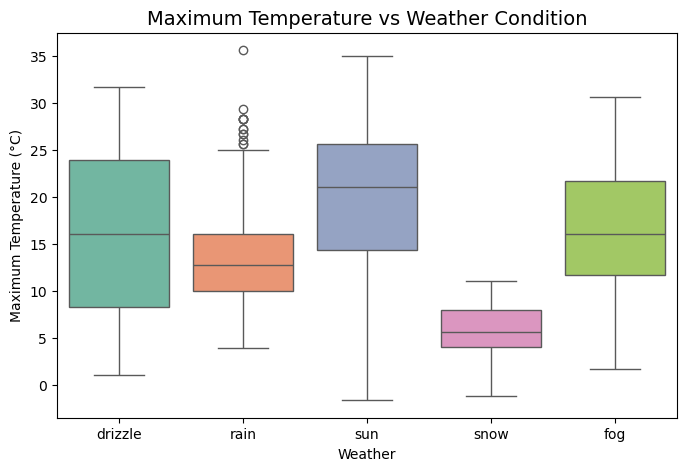

In [37]:
# Boxplot of temp_max grouped by weather
plt.figure(figsize=(8,5))
sns.boxplot(x='weather', y='temp_max', data=weather_dataset, palette="Set2")

plt.title("Maximum Temperature vs Weather Condition", fontsize=14)
plt.xlabel("Weather")
plt.ylabel("Maximum Temperature (°C)")
plt.show()

## 5.8 Boxplot of wind grouped by weather

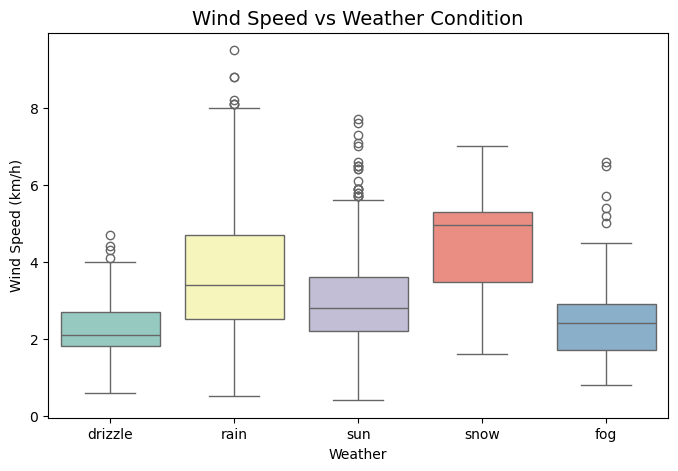

In [38]:
# Boxplot of wind grouped by weather
plt.figure(figsize=(8,5))
sns.boxplot(x='weather', y='wind', data=weather_dataset, palette="Set3")

plt.title("Wind Speed vs Weather Condition", fontsize=14)
plt.xlabel("Weather")
plt.ylabel("Wind Speed (km/h)")
plt.show()

## 5.9 Boxplot of precipitation grouped by weather

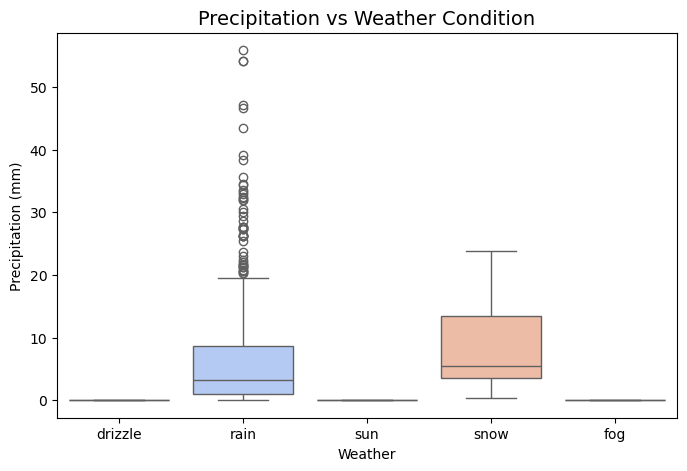

In [39]:
# Boxplot of precipitation grouped by weather
plt.figure(figsize=(8,5))
sns.boxplot(x='weather', y='precipitation', data=weather_dataset, palette="coolwarm")

plt.title("Precipitation vs Weather Condition", fontsize=14)
plt.xlabel("Weather")
plt.ylabel("Precipitation (mm)")
plt.show()

## 5.10  Correlation matrix (heatmap) and Pairplot of features colored by Weather

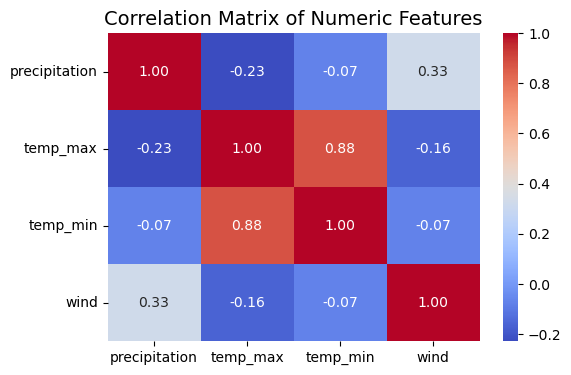

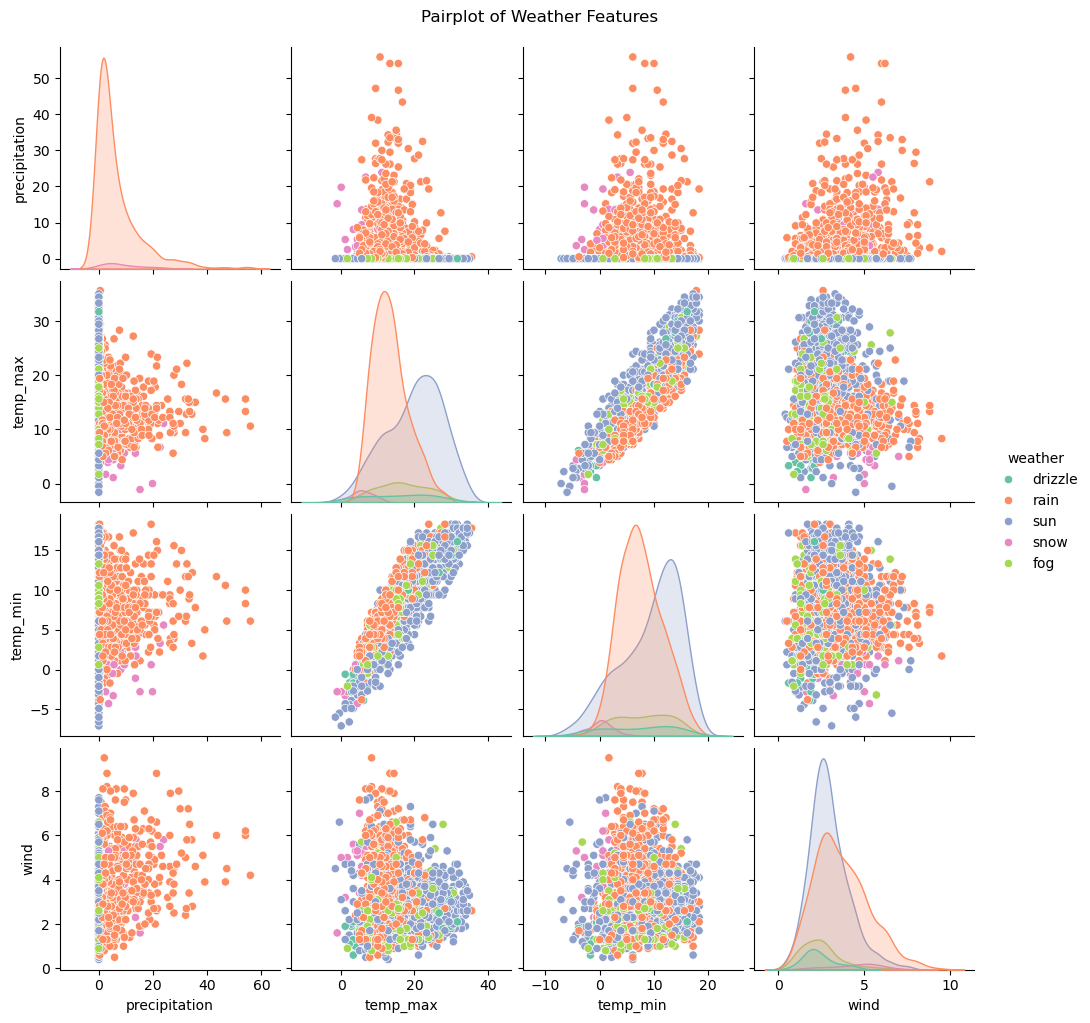

In [40]:
# 1) Correlation matrix (heatmap)
# -----------------------------
plt.figure(figsize=(6,4))
corr = weather_dataset[['precipitation', 'temp_max', 'temp_min', 'wind']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features", fontsize=14)
plt.show()

# -----------------------------
# 2) Pairplot of features colored by Weather
# -----------------------------
sns.pairplot(weather_dataset[['precipitation', 'temp_max', 'temp_min', 'wind', 'weather']], 
             hue='weather', palette="Set2", diag_kind='kde')
plt.suptitle("Pairplot of Weather Features", y=1.02)
plt.show()

## 5.11 check anormals in dataset

In [41]:
# temp_min greater than temp_max
anomalies = weather_dataset[weather_dataset['temp_min'] > weather_dataset['temp_max']]
print(anomalies)

# negative precipitation
anomalies_precip = weather_dataset[weather_dataset['precipitation'] < 0]
print(anomalies_precip)


Empty DataFrame
Columns: [precipitation, temp_max, temp_min, wind, weather]
Index: []
Empty DataFrame
Columns: [precipitation, temp_max, temp_min, wind, weather]
Index: []


## 6. Build and Deploy a Machine Learning Model

## 6.1 Model saving and loading


In [ ]:
# Model saving and loading.

In [42]:
import pickle
# Save the model
filename='weather_dataset_model.sav'
# loading the saved model 
pickle.dump(weather_dataset_model, open(filename, 'wb'))

# Save label encoder too (needed for decoding predictions)
pickle.dump(label_encoder, open('label_encoder.sav', 'wb'))

In [44]:
print("Welcome to weather prediction System APP")
# New input data (order: precipitation, temp_max, temp_min, wind)
input_data = [[0.0, 12.2, 5.6, 4.7]]

# Predict
prediction = weather_dataset_model.predict(input_data)
predicted_class = label_encoder.inverse_transform(prediction)

print("Tomorrow prediction:", predicted_class[0])

Welcome to weather prediction System APP
Tomorrow prediction: sun
